## IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics 
import warnings
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## READ THE DATA

In [2]:
# The datset which are csv are read from the folder directly 
df=pd.read_csv('sales_data_sample.csv',encoding='latin1')

print('The rows and columns are:',df.shape)
print(df.head())

The rows and columns are: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1        

## STATISTICS CHECK

Checking the basic statistics for the numerical columns in the dataset

In [3]:
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## NULL VALUES CHECK

In [5]:
print((df.isnull().mean()*100).sort_values(ascending=False).head(8))

ADDRESSLINE2        89.302161
STATE               52.639036
TERRITORY           38.044633
POSTALCODE           2.692171
ORDERNUMBER          0.000000
CUSTOMERNAME         0.000000
CONTACTFIRSTNAME     0.000000
CONTACTLASTNAME      0.000000
dtype: float64


### INSIGHTS:
1. The columns 'ADDRESSLINE2', 'STATE', 'TERRITORY' are missing a lot of data. It is better to remove them because it may lead to bias during analysis. Also these columns does not provide important information.

2. For the 'POSTALCODE' column, eventhough the imputation is possible but the column is unneccessary during the data modelling.

## REMOVING UNNECESSARY COLUMNS

In [6]:
drop_col = ['ORDERNUMBER','ORDERDATE','POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME','ADDRESSLINE1',
            'ADDRESSLINE2','STATE','PHONE','ORDERLINENUMBER','PRODUCTCODE']
df.drop(drop_col,axis=1,inplace=True)

## DATA VISUALISATION

#### QUARTERLY SALES PER YEAR

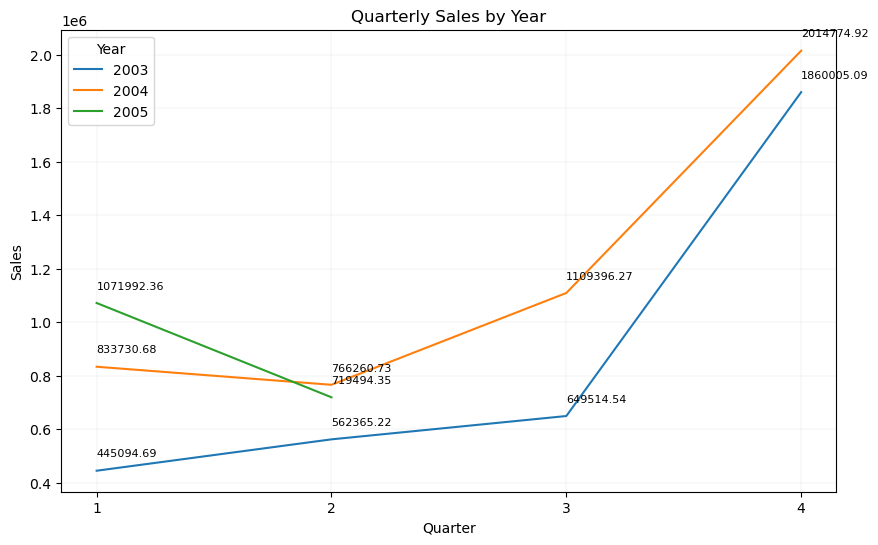

In [7]:
def plot_quar_sales_per_year(df, grpby1, grpby2, on):
    Q_sale = df.groupby([grpby1, grpby2])[on].sum().reset_index()

    """
    Plots quarterly sales per year with annotations for sales values.

    Parameters:
    - df: DataFrame
        The DataFrame containing sales data.
    - grpby1: str
        The column name representing the first grouping variable.
    - grpby2: str
        The column name representing the second grouping variable.
    - on: str
        The column name representing the sales values to sum.

    Returns:
    - None
    """
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for y in Q_sale[grpby1].unique():
        y_data = Q_sale[Q_sale[grpby1] == y]
        plt.plot(y_data[grpby2], y_data[on], label=str(y))
        for i, sales in enumerate(y_data[on]):
            plt.annotate(f'{sales:.2f}', (y_data[grpby2].iloc[i], sales), textcoords="offset points", xytext=(0,10), ha='left'
                        , fontsize=8)
    
    
    plt.title('Quarterly Sales by Year')   # title of the plot
    plt.xlabel('Quarter')   # x label
    plt.ylabel('Sales')   #y label
    plt.xticks(range(1,5))
    plt.legend(title='Year')
    plt.grid(True, color='grey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.savefig('Quarterly sales per year.png')   # Saving the image
    plt.show()
    
plot_quar_sales_per_year(df =df, grpby1 = 'YEAR_ID', grpby2 = 'QTR_ID', on = 'SALES' )

#### INSIGHTS
1. In 2003, sales increased in the first, second, and third quarters at a slow pace because it was a new company that came into the market with different toys. but there was a rapid growth in sales in the last quarter of the year. The reason would be the Christmas holidays and the products might have attracted a lot of customers for the last three quarters. So, the retail shops ordered more stock during that period.

2. In 2004, sales from the first and second quarters showed a slight decline because of the financial year, but in the last two quarters, the sales got a rapid growth. Finally, in 2005 the sales went down further than the 2004. 

#### SALES CALCULATED YEAR_WISE

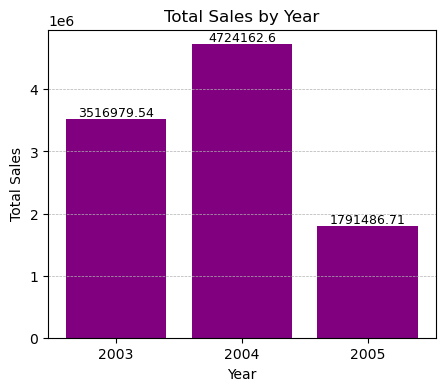

The best year according to sales is: 2004.0


In [8]:
# Plotting
def sales_per_yr(df, grpby,on):
    
    """
    Plots total sales per year and returns a DataFrame with the grouped sales data.

    Parameters:
    - df: DataFrame
        The DataFrame containing sales data.
    - grpby: str
        The column name to group by (e.g., 'YEAR_ID').
    - on: str
        The column name representing the sales values to sum (e.g., 'SALES').

    Returns:
    - DataFrame
        A DataFrame containing the grouped sales data, with columns specified by 'grpby' and 'on'.
    """
    
    y_sale1=df.groupby([grpby])[on].sum().reset_index()
    
    plt.figure(figsize=(5, 4))
    plot = plt.bar(y_sale1[grpby], y_sale1[on], color='purple')   # bar plot
    plt.title('Total Sales by Year')   # creating a title
    plt.xlabel('Year')   # x label
    plt.ylabel('Total Sales')  # y label
    plt.xticks(y_sale1[grpby])
    plt.grid(axis='y',linewidth=0.5,linestyle='--')
    
    # Add text labels on each bar
    for x, y in zip(plot, y_sale1[on]):
        plt.text(x.get_x() + x.get_width()/2, x.get_height() + 500, f'{y}', ha='center', va='bottom',fontsize=9)
    
    plt.savefig('Total sales per year.png')
    plt.show()

    return y_sale1

y_sale1 = sales_per_yr(df=df, grpby='YEAR_ID',on='SALES')

# Find the best year according to sales
best_year = y_sale1.loc[y_sale1['SALES'].idxmax()]

print("The best year according to sales is:", best_year['YEAR_ID'])

#### INSIGHTS
The sales for the 2003 year were around 3.5 million and in 2004 it was 4.7 million. The Sales increased for the first two years and especially, in the second year, the sales were over 1 million more than the previous year because of the popularity of the toys.

#### TOP SELLING PRODUCT FOR TOP CUSTOMER

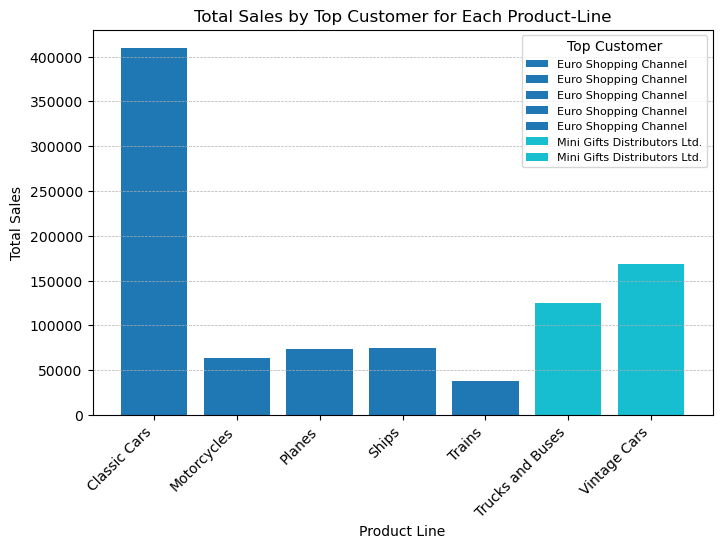

In [9]:
# Group by product line and customer name, and sum the sales

def Sales_topcustomer_per_product(data,grpby1,grpby2,on):
    
    """
    Plots total sales by top customer for each product line.

    Parameters:
    - data: DataFrame
        The DataFrame containing sales data.
    - grpby1: str
        The column name representing the first grouping variable.
    - grpby2: str
        The column name representing the second grouping variable.
    - on: str
        The column name representing the sales values to sum.

    Returns:
    - None
    """
    sales_pro = data.groupby([grpby1, grpby2])[on].sum().reset_index()
    
    # Find the customer with the highest total sales for each product line
    top_cus = sales_pro.loc[sales_pro.groupby(grpby1)[on].idxmax()]
    
    # Plotting
    plt.figure(figsize=(8, 5))
    
    # Creating a color map for customers
    cus_unique = top_cus[grpby2].unique()   # Unique customers
    colors = plt.cm.tab10(np.linspace(0, 1, len(cus_unique)))    # color mapping
    
    for i, (p, c, s) in enumerate(zip(top_cus[grpby1], top_cus[grpby2], top_cus[on])):
        plt.bar(p, s, color=colors[np.where(cus_unique == c)[0][0]], label=c)  # bar plot
    
    plt.title('Total Sales by Top Customer for Each Product-Line')  # creating title
    plt.xlabel('Product Line')   # x label
    plt.ylabel('Total Sales')  # y label
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Top Customer', bbox_to_anchor=(1, 1),fontsize=8)  # Creating the legend for Top Customers
    plt.grid(axis='y',linewidth=0.5,linestyle='--')
    
    plt.savefig('Total Sales by Top Customer for Each Product-Line.png')
    plt.show()
    return

Sales_topcustomer_per_product(data = df,grpby1 = 'PRODUCTLINE' ,grpby2 = 'CUSTOMERNAME', on='SALES')

#### INSIGHTS
1. The most selling product for three years was the classic car with an amount of more than 400,000. The rest of them did not have a chance to defeat that count. The next two selling products are trucks, buses, and Vintage cars. Most of all the retailers ordered these products because of the craze when compared to the rest of them around the world.

2. The least-selling product was the train which is not even 50 thousand and it's better to stop selling that product to save further production costs.

3. Furthermore, the companies that showed a lot of interest in buying the products are Euro Shopping Channel and Mini Gifts Distributors Ltd.

#### CORRELATION

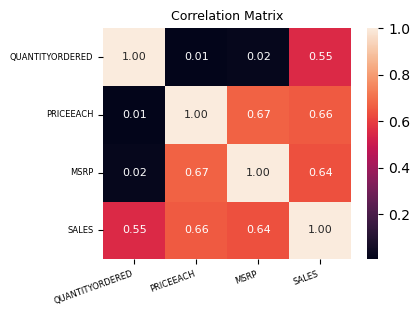

In [10]:
df1=df[['QUANTITYORDERED',"PRICEEACH","MSRP",'SALES']]

def correlation_map(data):
    
    """
    Generates a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    - data: DataFrame
        The input DataFrame for which the correlation matrix heatmap is to be generated.

    Returns:
    - None
    """
    
    plt.figure(figsize=(4,3))
    # Create the heatmap
    ax = sns.heatmap(data.corr(), annot=True, fmt=".2f", annot_kws={"size": 8})  # `annot_kws` to control the font size of annotations
    plt.xticks(rotation=20, ha='right', fontsize=6)  # Font size for x-axis labels
    plt.yticks(fontsize=6)  # Font size for y-axis labels
    plt.title('Correlation Matrix', fontsize=9)  # reducing the title font size as well
    plt.savefig('correlation.png', bbox_inches='tight')
    plt.show()
    return
correlation_map(data = df1)

#### INSIGHTS
No major correlation between numerical columns in the dataset. According to Sales domain, the company's profit and loss majorly depend on columns such as QuantityOrdered, Sales, PriceEach, and MSRP. For the clustering, these columns are considered by using a kmeans algorithm on them to visualize the clusters.

### CLUSTERING
#### Kmeans

In [11]:
inertia=[]
k=[]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=27)   # k means initialisation
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    k.append(i)

In [12]:
inertia

[11291.999999999996,
 6741.690574808543,
 4766.015137575975,
 3934.899898824264,
 3348.806695208053,
 2858.6413474895962,
 2548.535972515337,
 2351.074141484839,
 2170.260720068544]

#### ELBOW METHOD

From below figure, it is clear that the rate of decrease in WCSS slowed down at k = 4 and took that as an optimal K value.

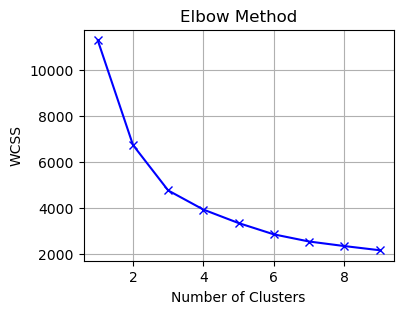

In [13]:
plt.figure(figsize=(4,3))
plt.plot(k,inertia,'bx-')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.savefig('Elbow_curve.png')
plt.show()

In [14]:
# Performing k-means clustering

def Clustering_algorithm(clusters,r_state,scaled_data):
    
    """
    Performs clustering using KMeans algorithm.

    Parameters:
    - clusters: int
        The number of clusters to form.
    - r_state: int
        The random state for reproducibility.
    - scaled_data: array-like
        The scaled input data for clustering.

    Returns:
    - cluster_labels: array
        The cluster labels assigned to each data point.
    - cluster_centroid: array
        The centroids of the clusters.
    """
    # Initialising the algorithm and fitting the data
    kmeans = KMeans(n_clusters=clusters, random_state=r_state)
    kmeans.fit(scaled_data)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Print the centroids of the clusters
    cluster_centroid = scaler.inverse_transform(kmeans.cluster_centers_)
    return cluster_labels, cluster_centroid





cluster_label, cluster_centroid = Clustering_algorithm(clusters=4,r_state=30,scaled_data=X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_label
print(cluster_centroid)

[[  29.57512116   56.03510501   62.25848142 1622.69274637]
 [  43.24118477   99.52504937  135.79407616 6059.0496615 ]
 [  27.42049093   96.49040555  114.49199573 3161.11688367]
 [  43.7437276    72.59421147   75.67204301 3172.66901434]]


In [15]:
def cluster_2dplot(df_,col,color_palette):
    
    """
    Plots a 2D scatter plot for clustering.

    Parameters:
    - df_: DataFrame
        The DataFrame containing the data to plot.
    - col: list
        The list containing the names of the columns to plot.
    - color_palette: str or list
        The color palette to use for the clusters.

    Returns:
    - None
    """
    
    col1,col2 = col
    
    plt.figure(figsize=(7,5))
    # Set the style
    sns.set(style="whitegrid")
    
    # Plot clusters
    sns.scatterplot(data=df_, x=col1, y=col2, hue='Cluster', palette=color_palette, legend='auto')
    
    # Set labels and title
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('cluster for '+col[0]+' vs '+col[1])
    
    # Save the plot
    plt.savefig('cluster_'+col[0]+'vs'+col[1]+'.png')
    # Show plot
    plt.show()
    return
    


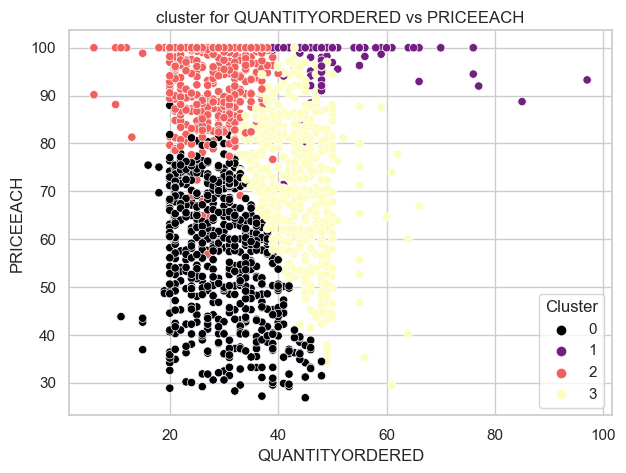

In [16]:
cluster1 = cluster_2dplot(df_=df,col=['QUANTITYORDERED','PRICEEACH'],color_palette='magma')

#### INSIGHTS
95% of the retailers were in the 20-50 range quantities. And as the price of the product increased, the retailers were also reduced. That means the product which had a price range of 30-80 had a lot of sales.

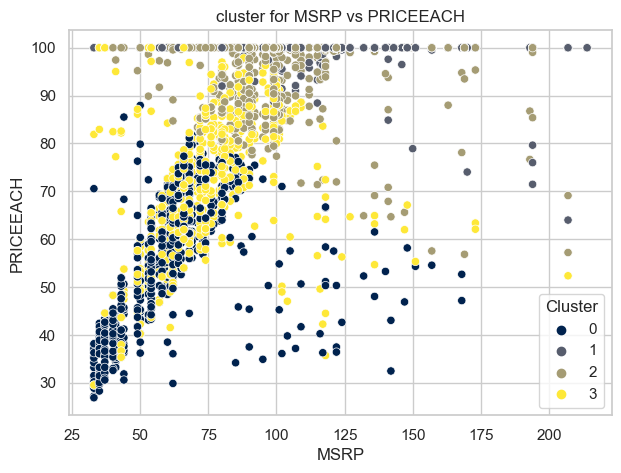

In [17]:
# 'coolwarm', 'magma', 'cividis', 'plasma', 'BuGn', 'BuPu', 'OrRd', a
cluster2 = cluster_2dplot(df_=df,col=['MSRP','PRICEEACH'],color_palette='cividis')

#### INSIGHTS
70% of the products were sold at market price was similar to the Manufacturer's Suggested Retail Price (MSRP). But, the rest of the products were either sold at higher or lower the MSRP price. There might have been a demand for those products at some point in time.

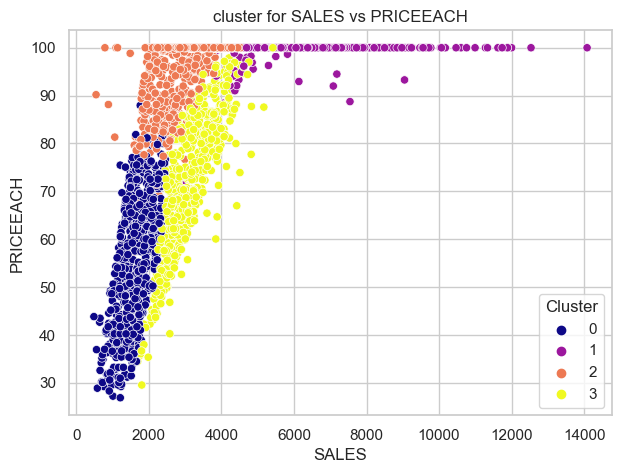

In [18]:
cluster3 = cluster_2dplot(df_=df,col=['SALES','PRICEEACH'],color_palette='plasma')

 A lot of products which has market price between 40-80 were sold when compared to rest of them because of the budject friendliness of the customers.

#### SILHOUETTE SCORE
Tells about how good the clustering is

In [19]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df1, cluster_label)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18930000431496466


## Linear Regression

In [20]:

final_df_model = df.copy()
label_encoder = LabelEncoder()   # Initialize LabelEncoder to convert categorical data to numerical
final_df_model['DEALSIZE'] = label_encoder.fit_transform(final_df_model['DEALSIZE'])  #  fitting on the data
final_df_model.head()

,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,Cluster
0,30,95.70,2871.00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,2,2
1,34,81.35,2765.90,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,2,2
2,41,94.74,3884.34,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,1,3
3,45,83.26,3746.70,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,1,3
4,49,100.00,5205.27,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,1,1


In [21]:
# Split df into X and y
def Linear_model(target,predictor,r_state):
    
    """
    Fits a linear regression model to the data and evaluates its performance.

    Parameters:
    - target: DataFrame or array-like
        The target variable (dependent variable) to predict.
    - predictor: DataFrame or array-like
        The predictor variables (independent variables) used for prediction.
    - r_state: int
        The random state for reproducibility.

    Returns:
    - None
    """
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(predictor,target, train_size=0.7, shuffle=True, random_state=r_state)
    
    # Linear model initialize
    l_reg = LinearRegression()  
    l_reg.fit(X_train, y_train)  # fitting the model
    
    # prediction on the test data 
    y_pred = l_reg.predict(X_test) 
    
    # Mean Absolute error calculation
    print('Mean Absolute Error for the data is :',metrics.mean_absolute_error(y_test, y_pred))   #MAE calculation
    #  Root Mean square error calculation
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))   #RMSE calculation
    print('Root mean square error is:',rmse)
    print('R square score of the model:',l_reg.score(X_test, y_test))   #R2 calculation
    
    return 

Y = ['SALES']
X = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP']
Linear_model(target=final_df_model[Y], predictor=final_df_model[X], r_state=35)

Mean Absolute Error for the data is : 591.4525221922446
Root mean square error is: 900.7057230065519
R square score of the model: 0.7726698356999494


#### INSIGHTS
1. The Mean absolute error is 591.46 which is less and indicates better accuracy in predictions and root mean square error is 900.7 which indicates predictions have a large spread around actual values.
2. Finally, R-squared score of 77.3 \% shows that the model explains the variance in sales which is also good. This evidence suggests that the independent variables used for sales forecasting are quite effective.

## FINAL THOUGHTS

1. By examining seasonality patterns, and key metrics such as mean absolute error, root mean square error, and R-squared score, sales forecasting is achieved. 
2. The segmentation of customers based on purchasing behavior has enabled the development of product offerings.
3. Furthermore, analysis of top-selling products in the exploratory data analysis and product price, has informed strategic decisions regarding which stock to sell more if the production cost should be less and pricing.
4. Through the use of the predictive model, achieved the ability to forecast future sales performance and identify influential factors, facilitating informed decision-making and strategic planning.